In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# import library
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [3]:
# read dataset
df = pd.read_excel('./drive/MyDrive/2023Spring/Dataset/final/area1.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2367 non-null   object 
 1   Drought Level Index  2367 non-null   float64
 2   Precipitation_in     2367 non-null   float64
 3   Temperature_C        2367 non-null   float64
 4   Vegetation           2367 non-null   float64
 5   Evapotranspiration   2367 non-null   float64
 6   County               2367 non-null   object 
dtypes: float64(5), object(2)
memory usage: 129.6+ KB


Drought Level Index  Precipitation_in  Temperature_C  \
Drought Level Index             1.000000         -0.154627       0.089334   
Precipitation_in               -0.154627          1.000000       0.186584   
Temperature_C                   0.089334          0.186584       1.000000   
Vegetation                     -0.271482          0.312227       0.282682   
Evapotranspiration             -0.345318          0.381205      -0.041829   

                     Vegetation  Evapotranspiration  
Drought Level Index   -0.271482           -0.345318  
Precipitation_in       0.312227            0.381205  
Temperature_C          0.282682           -0.041829  
Vegetation             1.000000            0.470983  
Evapotranspiration     0.470983            1.000000

<ipython-input-4-b04f18f2feea>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask =  np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

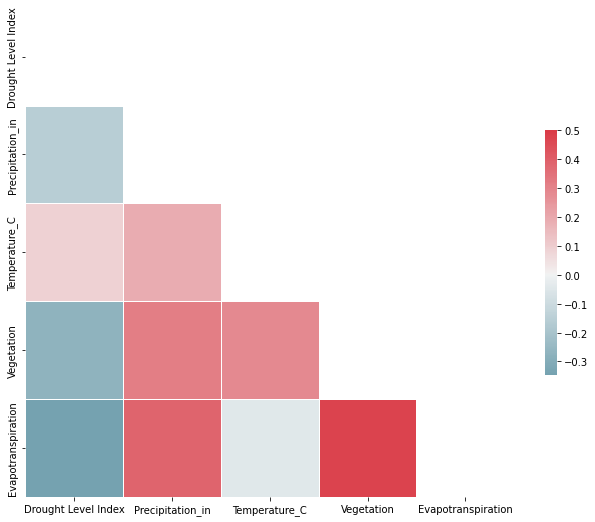

In [4]:
# compute correlations and plot correlation matrix
corr = df.corr(method='kendall')
display(corr)

# generate a mask for the upper triangle
mask =  np.triu(np.ones_like(corr, dtype=np.bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.5})

In [69]:
# training set and test set
Y = df['Drought Level Index']
X = df.iloc[:,2:6]
scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

In [70]:
# perform regression using all variables
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     Drought Level Index   R-squared:                       0.183
Model:                             OLS   Adj. R-squared:                  0.181
Method:                  Least Squares   F-statistic:                     105.4
Date:                 Wed, 01 Mar 2023   Prob (F-statistic):           3.92e-81
Time:                         22:29:33   Log-Likelihood:                -3328.6
No. Observations:                 1893   AIC:                             6667.
Df Residuals:                     1888   BIC:                             6695.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [71]:
X_test = sm.add_constant(X_test)
pred = model.predict(X_test) 
print('R squared:', metrics.r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R squared: 0.24470865512983953
MAE: 1.1670534819345906
MSE: 1.9548160141428306
RMSE: 1.3981473506547264


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


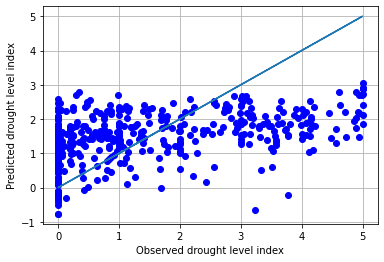

In [8]:
fig = plt.figure(figsize=(6,4))
plt.plot(y_test, pred, 'bo')
plt.plot(y_test, y_test + 0, linestyle='solid')
plt.xlabel('Observed drought level index')
plt.ylabel('Predicted drought level index')
plt.grid()
plt.show()